In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob

df_data202104 = pd.concat(map(pd.read_csv,
                        glob.glob('../data/interim/*lichess_db_standard_rated_2021-04*eval.blunders.csv')))
print("2021-04:",len(df_data202104),"rows")
df_data202104['Date'] = pd.to_datetime('2021-04')

df_data202002 = pd.concat(map(pd.read_csv,
                        glob.glob('../data/interim/*lichess_db_standard_rated_2020-02*eval.blunders.csv')))
print("2020-02:",len(df_data202002),"rows")
df_data202002['Date'] = pd.to_datetime('2020-02')

df_data = pd.concat([df_data202104, df_data202002])

df_data.head()

2021-04: 307673 rows
2020-02: 785708 rows


,Move,FEN,Turn,Elo,TimeControl,ElapsedSeconds,Date
0,Bg4,rnbqkbnr/pp2pppp/2p5/3p4/3P1B2/4P3/PPP2PPP/RN1...,3,1402,600+0,594.0,2021-04-01
1,Nf3,rn1qkbnr/pp2pppp/2p5/3p4/3P1Bb1/4P3/PPP2PPP/RN...,4,1355,600+0,593.0,2021-04-01
2,Ng5,r2q1rk1/1pp3pp/p2b4/5p2/3Qb3/5N2/PPP2PPP/R1B1R...,13,1899,600+0,554.0,2021-04-01
3,Bh6,rnbqkbnr/pp2pp1p/3p2p1/2p5/2B1P3/3P1Q2/PPP2PPP...,4,1345,600+0,576.0,2021-04-01
4,Bb5+,rnbqk1nr/pp2pp1p/3p2pb/2p5/2B1P3/3P1Q2/PPP2PPP...,5,1500,600+0,550.0,2021-04-01


# Explore by Elo

In [3]:
grouped_by_elo = df_data.groupby( pd.cut(df_data['Elo'], np.arange(600, 3000, 200)) )
grouped_by_elo.size()

Elo
(600, 800]       12403
(800, 1000]      67233
(1000, 1200]    161753
(1200, 1400]    218061
(1400, 1600]    238464
(1600, 1800]    188409
(1800, 2000]    123632
(2000, 2200]     57597
(2200, 2400]     18173
(2400, 2600]      5270
(2600, 2800]      1578
dtype: int64

In [4]:
for low_thr in range(600,2600,200):
    vc = grouped_by_elo.get_group(pd.Interval(low_thr, low_thr+200, closed='right')).value_counts(['Move', 'FEN'])
    #with pd.option_context('display.max_rows', 8):
    print(f"Elo: ({low_thr},{low_thr+200}]")
    print(vc[vc>1].head(10))
    print("---")

Elo: (600,800]
Move  FEN                                                                
g6    rnbqkbnr/pppp1ppp/8/4p2Q/4P3/8/PPPP1PPP/RNB1KBNR b KQkq - 1 2          18
Nxe5  r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3        5
g6    rnbqk1nr/pppp1ppp/8/2b1p2Q/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 3 3       3
Qh4   rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2          3
dxe5  rnbqkbnr/ppp2ppp/3p4/4P3/4P3/8/PPPP2PP/RNBQKBNR b KQkq - 0 3            3
Ng5   r1bqk1nr/pppp1ppp/2n5/2b1p3/2B1P3/5N2/PPPP1PPP/RNBQK2R w KQkq - 4 4     3
g5    rnbqkbnr/ppppp1pp/5p2/8/3PP3/8/PPP2PPP/RNBQKBNR b KQkq - 0 2            3
f3    rnbqkb1r/pppp1ppp/8/4N3/4n3/8/PPPP1PPP/RNBQKB1R w KQkq - 0 4            3
g4    rnbqkbnr/pppp1ppp/8/4p3/8/5P2/PPPPP1PP/RNBQKBNR w KQkq - 0 2            2
d4    rnbqkb1r/pppp1ppp/8/2n1N3/8/8/PPPPQPPP/RNB1KB1R w KQkq - 2 5            2
dtype: int64
---
Elo: (800,1000]
Move  FEN                                                                 
g6 

# Explore by Date

In [5]:
grouped_by_elo = df_data.groupby( [pd.cut(df_data['Elo'], np.arange(600, 3000, 200)),'Date'] )
grouped_by_elo.size()

Elo           Date      
(600, 800]    2020-02-01      2982
              2021-04-01      9421
(800, 1000]   2020-02-01     31039
              2021-04-01     36194
(1000, 1200]  2020-02-01    100616
              2021-04-01     61137
(1200, 1400]  2020-02-01    150361
              2021-04-01     67700
(1400, 1600]  2020-02-01    178206
              2021-04-01     60258
(1600, 1800]  2020-02-01    150068
              2021-04-01     38341
(1800, 2000]  2020-02-01    102312
              2021-04-01     21320
(2000, 2200]  2020-02-01     48846
              2021-04-01      8751
(2200, 2400]  2020-02-01     15155
              2021-04-01      3018
(2400, 2600]  2020-02-01      4326
              2021-04-01       944
(2600, 2800]  2020-02-01      1414
              2021-04-01       164
dtype: int64

In [6]:
for low_thr in range(600,2600,200):
    #for date in grouped_by_elo.Date.unique():
    #for date in set([tup[1] for tup in list(grouped_by_elo.groups.keys())]):
    for date in [pd.Timestamp('2020-02-01 00:00:00'),pd.Timestamp('2021-04-01 00:00:00')]:
        vc = grouped_by_elo.get_group((pd.Interval(low_thr, low_thr+200, closed='right'),date)).value_counts(['Move', 'FEN'])
        print(f"Date: {date}. Elo: ({low_thr},{low_thr+200}]")
        print(vc[vc>1].head(5))
    print("---")

Date: 2020-02-01 00:00:00. Elo: (600,800]
Move  FEN                                                             
g6    rnbqkbnr/pppp1ppp/8/4p2Q/4P3/8/PPPP1PPP/RNB1KBNR b KQkq - 1 2       3
Nc6   rn1qkbnr/ppp1pppp/8/3p1b2/2PP4/2N5/PP2PPPP/R1BQKBNR b KQkq - 2 3    2
dtype: int64
Date: 2021-04-01 00:00:00. Elo: (600,800]
Move  FEN                                                             
g6    rnbqkbnr/pppp1ppp/8/4p2Q/4P3/8/PPPP1PPP/RNB1KBNR b KQkq - 1 2       15
Nxe5  r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3     5
g5    rnbqkbnr/ppppp1pp/5p2/8/3PP3/8/PPP2PPP/RNBQKBNR b KQkq - 0 2         3
f3    rnbqkb1r/pppp1ppp/8/4N3/4n3/8/PPPP1PPP/RNBQKB1R w KQkq - 0 4         3
dxe5  rnbqkbnr/ppp2ppp/3p4/4P3/4P3/8/PPPP2PP/RNBQKBNR b KQkq - 0 3         3
dtype: int64
---
Date: 2020-02-01 00:00:00. Elo: (800,1000]
Move  FEN                                                                 
g6    rnbqkbnr/pppp1ppp/8/4p2Q/4P3/8/PPPP1PPP/RNB1KBNR b KQkq - 1 2           27
Ng5   r1

# Explore by plots

<AxesSubplot:>

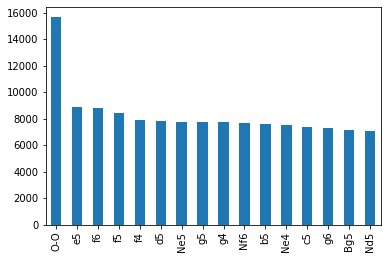

In [14]:
vc = df_data.Move.value_counts()
vc[vc>7000].plot(kind='bar')

In [81]:
s = df_data.groupby(['Date','Move']).size().sort_values(ascending=False).to_frame('size')
s[s>3000].reset_index().set_index('Date').dropna() #.plot(y='size')

,Move,size
Date,,
2020-02-01,O-O,7876.0
2021-04-01,O-O,7776.0
2020-02-01,f5,5932.0
2020-02-01,f4,5806.0
2020-02-01,f6,5568.0
...,...,...
2020-02-01,Bd6,3153.0
2021-04-01,Bg5,3142.0
2020-02-01,Qf6,3131.0
